In [1]:
import pandas as pd
import os
import sys

VERSION = 12
COMPLETEDVERSION = 1

sys.path.append(os.path.abspath("../"))

In [3]:
def getFiles():
    fileExist = True
    EPOCH = 1
    reportPath = (
        "./../GameModels/v{ver}/Report/rp-{comVer}-epc-{epoch}.csv"
    )

    while fileExist:
        if os.path.exists(
                reportPath.format(
                    ver=VERSION, comVer=COMPLETEDVERSION, epoch=EPOCH
                )
            ):
                print(
                    reportPath.format(
                        ver=VERSION, comVer=COMPLETEDVERSION, epoch=EPOCH
                    )
                )
                EPOCH += 1
        else:
            fileExist = False
            
    return EPOCH

In [4]:
totalEpoch = getFiles()

./../GameModels/v12/Report/rp-1-epc-1.csv
./../GameModels/v12/Report/rp-1-epc-2.csv
./../GameModels/v12/Report/rp-1-epc-3.csv
./../GameModels/v12/Report/rp-1-epc-4.csv
./../GameModels/v12/Report/rp-1-epc-5.csv
./../GameModels/v12/Report/rp-1-epc-6.csv
./../GameModels/v12/Report/rp-1-epc-7.csv
./../GameModels/v12/Report/rp-1-epc-8.csv
./../GameModels/v12/Report/rp-1-epc-9.csv
./../GameModels/v12/Report/rp-1-epc-10.csv
./../GameModels/v12/Report/rp-1-epc-11.csv
./../GameModels/v12/Report/rp-1-epc-12.csv
./../GameModels/v12/Report/rp-1-epc-13.csv
./../GameModels/v12/Report/rp-1-epc-14.csv
./../GameModels/v12/Report/rp-1-epc-15.csv
./../GameModels/v12/Report/rp-1-epc-16.csv


In [5]:
def arrayDataframes(totalEpoch):
    array = []
    reportPath = "./../GameModels/v{ver}/Report/rp-{comVer}-epc-{epoch}.csv"
    for epoch in range(1, totalEpoch):
        dataframe = pd.read_csv(
            reportPath.format(ver=VERSION, comVer=COMPLETEDVERSION, epoch=epoch)
        )
        array.append(dataframe)
    return array
        

In [6]:
arrayDataframe = arrayDataframes(totalEpoch)

In [7]:
def summaryDataframes(arrayDataframe):
    df = pd.DataFrame()
    chkpnt = 1

    for dataframe in arrayDataframe:
        dictValue = {
            "ckpnt": chkpnt,
            "loss": (dataframe["status"] == "loss").sum(),
            "win": (dataframe["status"] == "win").sum(),
            "draw": (dataframe["status"] == "draw").sum(),
        }
        chkpnt = chkpnt + 1
        df = pd.concat([df, pd.DataFrame.from_records([dictValue])], ignore_index=True)
    return df

In [8]:
df = summaryDataframes(arrayDataframe)


In [9]:
df.head()

,ckpnt,loss,win,draw
0,1,269,142,88
1,2,287,186,26
2,3,314,65,120
3,4,292,137,70
4,5,306,71,122


In [10]:
print(f"Version: {VERSION}")
df.median()

Version: 12


ckpnt      8.5
loss     291.0
win      135.5
draw      90.5
dtype: float64

<Axes: >

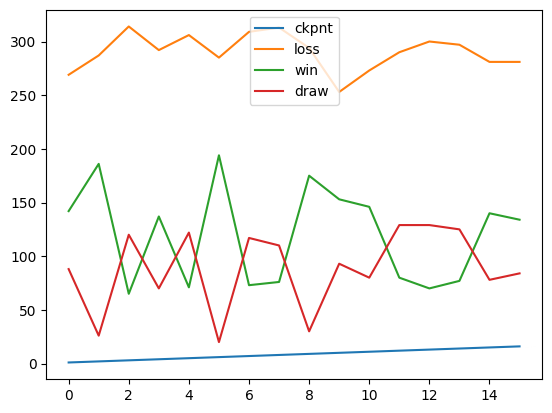

In [11]:
df.plot()

In [12]:
df["percentage"] = round((df["win"]*100/(df["win"]+df["loss"])),2)
df["percentage"].mean()

28.589375